In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import itertools
import collections
import pickle
%matplotlib inline 
import sys
import os
sys.path.append("./data/")
import seaborn as sns
sns.set(color_codes=True)


C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def load_pkl(filename):
    
    """
    Function accepts a .pkl filename and loads (de-serializes) object
    """
    
    with open(filename, "r") as infile:
        obj = pickle.load(infile)
        return obj

In [3]:
pickled_files= os.listdir('./data')

names= [os.path.splitext(f)[0] for f in pickled_files]

cond= [name.split('data_dict_')[1] for name in names]

cond

['alphap1_gammap25_epsp1',
 'alphap1_gammap5_epsp1',
 'alphap1_gammap9_epsp1',
 'alphap1_gammap9_epsp25',
 'alphap1_gammap9_epsp5',
 'alphap25_gammap9_epsp1',
 'alphap5_gammap9_epsp1']

In [4]:
name_cond_map= dict(zip(pickled_files, cond))

name_cond_map

{'data_dict_alphap1_gammap25_epsp1.pkl': 'alphap1_gammap25_epsp1',
 'data_dict_alphap1_gammap5_epsp1.pkl': 'alphap1_gammap5_epsp1',
 'data_dict_alphap1_gammap9_epsp1.pkl': 'alphap1_gammap9_epsp1',
 'data_dict_alphap1_gammap9_epsp25.pkl': 'alphap1_gammap9_epsp25',
 'data_dict_alphap1_gammap9_epsp5.pkl': 'alphap1_gammap9_epsp5',
 'data_dict_alphap25_gammap9_epsp1.pkl': 'alphap25_gammap9_epsp1',
 'data_dict_alphap5_gammap9_epsp1.pkl': 'alphap5_gammap9_epsp1'}

In [5]:
pickled_files

['data_dict_alphap1_gammap25_epsp1.pkl',
 'data_dict_alphap1_gammap5_epsp1.pkl',
 'data_dict_alphap1_gammap9_epsp1.pkl',
 'data_dict_alphap1_gammap9_epsp25.pkl',
 'data_dict_alphap1_gammap9_epsp5.pkl',
 'data_dict_alphap25_gammap9_epsp1.pkl',
 'data_dict_alphap5_gammap9_epsp1.pkl']

dfs= dict()
for f in pickled_files:
    
    pkl_file= os.path.join('data/', f)
    df= pd.DataFrame(load_pkl(pkl_file))
    condition= name_cond_map[f]
    dfs[condition]= df

    # probably read into a datframe etc. etc. and concat
    
    # http://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
    

In [6]:
dfs= list()
for f in pickled_files:
    
    pkl_file= os.path.join('data/', f)
    df= pd.DataFrame(load_pkl(pkl_file))
    dfs.append(df)

In [7]:
alphap1_gammap5_epsp1, alphap1_gammap25_epsp1, alphap25_gammap9_epsp1, alphap1_gammap9_epsp1, alphap1_gammap9_epsp5, alphap1_gammap9_epsp25, alphap5_gammap9_epsp1= dfs

In [8]:
i= 0
for condition in cond:
    dfs[i]['condition']= condition
    i += 1

In [9]:
big_df= pd.concat(dfs)

In [10]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9937 entries, 0 to 1288
Data columns (total 4 columns):
lenq         9937 non-null int64
qtables      9937 non-null object
successes    9937 non-null int64
condition    9937 non-null object
dtypes: int64(2), object(2)
memory usage: 310.5+ KB


In [11]:
lenqs= big_df[['lenq', 'condition']]

In [12]:
lenqs= lenqs.pivot(columns= 'condition', values= 'lenq')

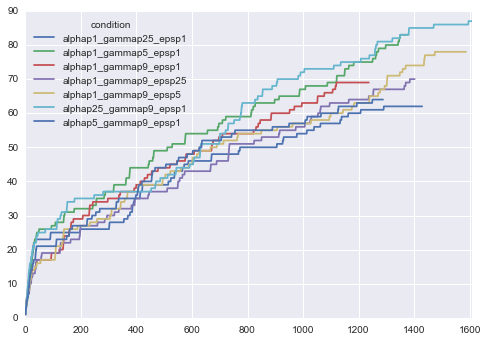

In [13]:
lenqs.plot()

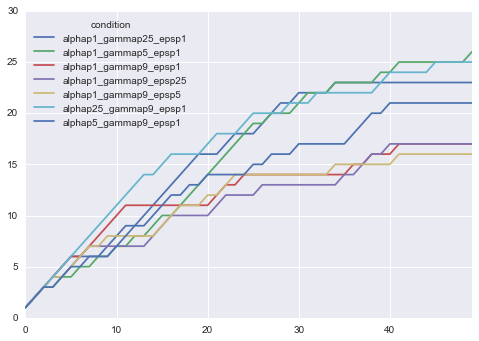

In [14]:
lenqs.iloc[0:50].plot()

In [15]:
succ_piv= big_df[['successes', 'condition']].pivot(columns= 'condition', values= 'successes')

In [16]:
succ_piv.describe().loc[['mean', 'std']]

condition,alphap1_gammap25_epsp1,alphap1_gammap5_epsp1,alphap1_gammap9_epsp1,alphap1_gammap9_epsp25,alphap1_gammap9_epsp5,alphap25_gammap9_epsp1,alphap5_gammap9_epsp1
mean,0.067832,0.067391,0.078352,0.067712,0.057935,0.059043,0.076028
std,0.251546,0.250789,0.268834,0.251341,0.233693,0.235778,0.265146


In [17]:
big_df.groupby('condition')['successes'].mean().sort_values(ascending= False)

condition
alphap1_gammap9_epsp1     0.078352
alphap5_gammap9_epsp1     0.076028
alphap1_gammap25_epsp1    0.067832
alphap1_gammap9_epsp25    0.067712
alphap1_gammap5_epsp1     0.067391
alphap25_gammap9_epsp1    0.059043
alphap1_gammap9_epsp5     0.057935
Name: successes, dtype: float64

In [18]:
big_df.groupby('condition')['successes'].sum().sort_values(ascending= False)

condition
alphap5_gammap9_epsp1     98
alphap1_gammap9_epsp1     97
alphap1_gammap25_epsp1    97
alphap25_gammap9_epsp1    95
alphap1_gammap9_epsp25    95
alphap1_gammap5_epsp1     93
alphap1_gammap9_epsp5     92
Name: successes, dtype: int64

In [19]:
big_df.groupby('condition')['lenq'].mean()

condition
alphap1_gammap25_epsp1    44.399301
alphap1_gammap5_epsp1     53.952899
alphap1_gammap9_epsp1     46.501616
alphap1_gammap9_epsp25    44.959373
alphap1_gammap9_epsp5     50.077456
alphap25_gammap9_epsp1    58.257303
alphap5_gammap9_epsp1     45.525213
Name: lenq, dtype: float64

In [20]:
base_cond_df= big_df[big_df.condition== 'alphap1_gammap9_epsp1']

In [21]:
base_cond_df.groupby(base_cond_df.index / 10).successes.mean()

0      0.000
1      0.000
2      0.000
3      0.100
4      0.000
5      0.200
6      0.000
7      0.100
8      0.100
9      0.100
10     0.100
11     0.200
12     0.000
13     0.100
14     0.100
15     0.100
16     0.000
17     0.000
18     0.000
19     0.000
20     0.100
21     0.100
22     0.100
23     0.000
24     0.100
25     0.100
26     0.000
27     0.100
28     0.100
29     0.000
       ...  
94     0.000
95     0.100
96     0.100
97     0.100
98     0.100
99     0.000
100    0.100
101    0.100
102    0.100
103    0.100
104    0.200
105    0.100
106    0.100
107    0.000
108    0.200
109    0.100
110    0.000
111    0.100
112    0.100
113    0.200
114    0.000
115    0.100
116    0.100
117    0.100
118    0.000
119    0.100
120    0.000
121    0.200
122    0.100
123    0.125
Name: successes, dtype: float64

In [22]:
lenqs.max().sort_values(ascending= False)

condition
alphap25_gammap9_epsp1    87.0
alphap1_gammap5_epsp1     83.0
alphap1_gammap9_epsp5     78.0
alphap1_gammap9_epsp25    70.0
alphap1_gammap9_epsp1     69.0
alphap5_gammap9_epsp1     64.0
alphap1_gammap25_epsp1    62.0
dtype: float64

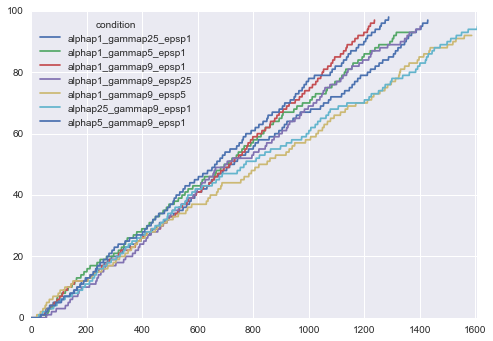

In [23]:
big_df.pivot(columns= 'condition', values= 'successes').cumsum().plot()

In [24]:
max_base_q= max(base_cond_df.iloc[1237].qtables.values())

In [25]:
policy= base_cond_df.iloc[1237].qtables.keys()[base_cond_df.iloc[1237].qtables.values().index(max_base_q)]

In [26]:
q_piv= big_df.pivot(columns= 'condition', values= 'qtables')   

In [27]:
lener= lambda x: len(x)

In [53]:
set(big_df.condition)

{'alphap1_gammap25_epsp1',
 'alphap1_gammap5_epsp1',
 'alphap1_gammap9_epsp1',
 'alphap1_gammap9_epsp25',
 'alphap1_gammap9_epsp5',
 'alphap25_gammap9_epsp1',
 'alphap5_gammap9_epsp1'}

In [60]:
big_df[big_df.condition== 'alphap1_gammap9_epsp1'].qtables[1237]

{(('green', None, None, None, 'forward'), None): 0.0,
 (('green', None, None, None, 'forward'), 'forward'): 6.132283212465348,
 (('green', None, None, None, 'left'), 'left'): 8.43767377788923,
 (('green', None, None, None, 'right'), 'left'): -0.5,
 (('green', None, None, None, 'right'), 'right'): 6.809170982132021,
 (('green', None, None, 'forward', 'forward'), 'forward'): 2.162,
 (('green', None, None, 'forward', 'left'), 'right'): -0.5,
 (('green', None, None, 'forward', 'right'), 'right'): 2.0,
 (('green', None, None, 'left', 'forward'), None): 0.0,
 (('green', None, None, 'left', 'forward'), 'forward'): 12.1592,
 (('green', None, None, 'left', 'forward'), 'left'): -0.5,
 (('green', None, None, 'left', 'forward'), 'right'): -0.5,
 (('green', None, None, 'left', 'left'), 'right'): -0.5,
 (('green', None, None, 'right', 'forward'), 'left'): -0.5,
 (('green', None, 'forward', None, 'forward'), 'forward'): 12.0,
 (('green', None, 'left', None, 'forward'), None): 0.0,
 (('green', None, '

### Generate  all policies

In [28]:
traffic_light_states= ['red', 'green']
valid_actions= [None, 'forward', 'left', 'right']

In [43]:
# state products
states= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions, valid_actions, valid_actions))

states2= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions, valid_actions))

states3= tuple(itertools.product(traffic_light_states,valid_actions, valid_actions))

In [44]:
# product of states and actions
policies= tuple(itertools.product(states, valid_actions))
policies2= tuple(itertools.product(states2, valid_actions))
policies3= tuple(itertools.product(states3, valid_actions))

In [45]:
len(policies)

2048

In [46]:
len(policies2)

512

In [47]:
len(policies3)

128

In [50]:
2 * 4 * 4 * 4 *4

512

In [32]:
policies_dict= dict(zip(policies, [list() for item in policies]))

In [33]:
policies_dict

{(('red', 'left', 'forward', 'right', 'right'), 'right'): [],
 (('red', None, 'forward', 'forward', 'left'), 'forward'): [],
 (('green', 'right', 'left', 'forward', 'right'), 'forward'): [],
 (('green', 'right', 'left', 'right', 'left'), 'forward'): [],
 (('red', 'left', None, 'left', 'right'), 'left'): [],
 (('green', 'forward', None, 'left', 'forward'), 'left'): [],
 (('green', 'right', 'left', 'left', None), 'forward'): [],
 (('green', 'forward', 'left', 'left', 'left'), None): [],
 (('green', None, None, None, None), 'left'): [],
 (('green', None, 'left', 'right', 'left'), 'left'): [],
 (('green', 'left', None, 'forward', 'forward'), 'left'): [],
 (('red', 'left', 'left', None, 'left'), 'forward'): [],
 (('green', 'forward', None, 'forward', 'forward'), 'forward'): [],
 (('red', 'left', None, None, None), 'forward'): [],
 (('red', 'forward', 'forward', None, 'left'), 'right'): [],
 (('red', 'left', 'forward', 'right', 'forward'), 'forward'): [],
 (('green', None, None, 'right', 'le

In [34]:
for key in policies_dict.keys():
    policies_dict[key]= range(5)

In [35]:
policies_dict

{(('red', 'left', 'forward', 'right', 'right'), 'right'): [0, 1, 2, 3, 4],
 (('red', None, 'forward', 'forward', 'left'), 'forward'): [0, 1, 2, 3, 4],
 (('green', 'right', 'left', 'forward', 'right'), 'forward'): [0, 1, 2, 3, 4],
 (('green', 'right', 'left', 'right', 'left'), 'forward'): [0, 1, 2, 3, 4],
 (('red', 'left', None, 'left', 'right'), 'left'): [0, 1, 2, 3, 4],
 (('green', 'forward', None, 'left', 'forward'), 'left'): [0, 1, 2, 3, 4],
 (('green', 'right', 'left', 'left', None), 'forward'): [0, 1, 2, 3, 4],
 (('green', 'forward', 'left', 'left', 'left'), None): [0, 1, 2, 3, 4],
 (('green', None, None, None, None), 'left'): [0, 1, 2, 3, 4],
 (('green', None, 'left', 'right', 'left'), 'left'): [0, 1, 2, 3, 4],
 (('green', 'left', None, 'forward', 'forward'), 'left'): [0, 1, 2, 3, 4],
 (('red', 'left', 'left', None, 'left'), 'forward'): [0, 1, 2, 3, 4],
 (('green', 'forward', None, 'forward', 'forward'), 'forward'): [0,
  1,
  2,
  3,
  4],
 (('red', 'left', None, None, None), 'f

In [36]:
[key for key in policies_dict if key in df.qtables[10].keys()]

[(('green', None, None, 'right', 'left'), 'left'),
 (('green', None, 'right', None, 'left'), 'left'),
 (('green', None, None, 'right', 'forward'), 'right'),
 (('green', None, 'forward', None, 'left'), None),
 (('green', None, None, 'forward', 'forward'), 'forward'),
 (('green', None, None, 'forward', 'left'), 'right'),
 (('green', None, None, None, 'forward'), 'right'),
 (('green', None, None, 'forward', 'forward'), None),
 (('red', 'forward', None, None, 'forward'), 'left'),
 (('red', None, 'right', None, 'forward'), None),
 (('green', None, 'forward', None, 'forward'), 'forward'),
 (('red', None, None, 'left', 'forward'), None),
 (('red', None, None, None, 'forward'), 'right'),
 (('red', 'left', None, None, 'left'), 'right'),
 (('red', None, None, 'right', 'forward'), 'forward'),
 (('red', None, None, None, 'right'), 'left'),
 (('green', None, None, 'right', 'forward'), 'left'),
 (('green', 'right', None, None, 'left'), 'forward'),
 (('green', None, None, None, 'left'), 'left'),
 (('

### Setup Mappings

- map each potential policy to a number
- map each value to a number

This was we can just use numbers as the keys then convert back to the actual policy if needed

In [37]:
keys= policies_dict.keys()
nums= range(len(keys))

pol_map= dict(zip(keys, nums))

vals= policies_dict.values()

map_pol= dict(zip(nums, vals))

In [38]:
pd.DataFrame(map_pol).transpose()

,0,1,2,3,4
0,0,1,2,3,4
1,0,1,2,3,4
2,0,1,2,3,4
3,0,1,2,3,4
4,0,1,2,3,4
5,0,1,2,3,4
6,0,1,2,3,4
7,0,1,2,3,4
8,0,1,2,3,4
9,0,1,2,3,4
